In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("medical.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0


In [27]:
#Include missing values manually because in the original dataset there is no missing values.
df.loc[df.sample(frac=0.1).index, 'Age'] = np.nan
df.loc[df.sample(frac=0.1).index, 'Neighbourhood'] = np.nan

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106987 entries, 0 to 106986
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       106987 non-null  float64
 1   AppointmentID   106987 non-null  int64  
 2   Gender          106987 non-null  object 
 3   ScheduledDay    106987 non-null  object 
 4   AppointmentDay  106987 non-null  object 
 5   Age             96288 non-null   float64
 6   Neighbourhood   96288 non-null   object 
 7   Scholarship     106987 non-null  bool   
 8   Hipertension    106987 non-null  bool   
 9   Diabetes        106987 non-null  bool   
 10  Alcoholism      106987 non-null  bool   
 11  Handcap         106987 non-null  bool   
 12  SMS_received    106987 non-null  bool   
 13  Showed_up       106987 non-null  bool   
 14  Date.diff       106987 non-null  int64  
dtypes: bool(7), float64(2), int64(2), object(4)
memory usage: 7.2+ MB


In [29]:
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent.sort_values(ascending=False))


Age               19.031284
Neighbourhood     19.026611
PatientId          0.000000
AppointmentID      0.000000
Gender             0.000000
ScheduledDay       0.000000
AppointmentDay     0.000000
Scholarship        0.000000
Hipertension       0.000000
Diabetes           0.000000
Alcoholism         0.000000
Handcap            0.000000
SMS_received       0.000000
Showed_up          0.000000
Date.diff          0.000000
dtype: float64


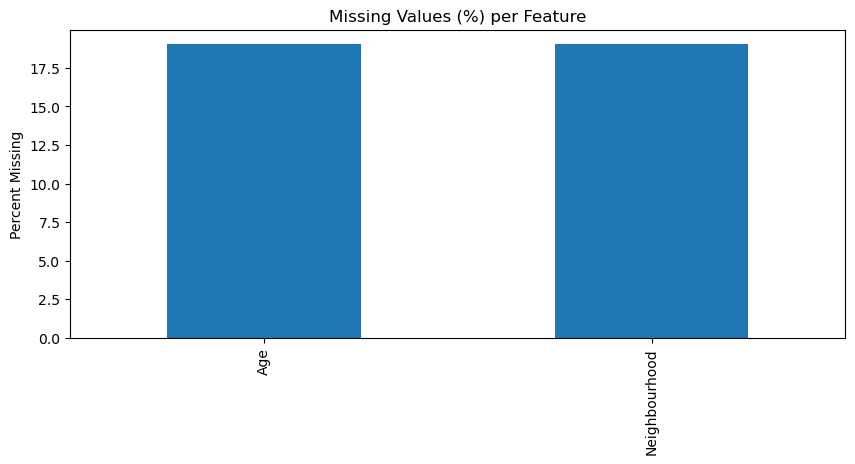

In [31]:
#Visuliazation of missing values by bar graph
missing_percent[missing_percent > 0].plot(kind='bar', figsize=(10,4))
plt.title("Missing Values (%) per Feature")
plt.ylabel("Percent Missing")
plt.show()


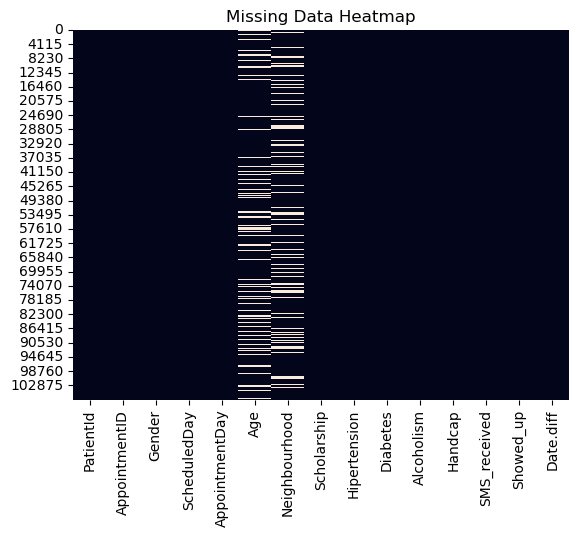

In [33]:
#HeatMap
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Data Heatmap")
plt.show()


In [35]:
#Numerical Imputation (Age -> Median)
df['Age'] = df['Age'].fillna(df['Age'].median())


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106987 entries, 0 to 106986
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       106987 non-null  float64
 1   AppointmentID   106987 non-null  int64  
 2   Gender          106987 non-null  object 
 3   ScheduledDay    106987 non-null  object 
 4   AppointmentDay  106987 non-null  object 
 5   Age             106987 non-null  float64
 6   Neighbourhood   86631 non-null   object 
 7   Scholarship     106987 non-null  bool   
 8   Hipertension    106987 non-null  bool   
 9   Diabetes        106987 non-null  bool   
 10  Alcoholism      106987 non-null  bool   
 11  Handcap         106987 non-null  bool   
 12  SMS_received    106987 non-null  bool   
 13  Showed_up       106987 non-null  bool   
 14  Date.diff       106987 non-null  int64  
dtypes: bool(7), float64(2), int64(2), object(4)
memory usage: 7.2+ MB


In [39]:
#Categorical Imputation (Neighbourhood -> Mode)
df['Neighbourhood'] = df['Neighbourhood'].fillna(df['Neighbourhood'].mode()[0])


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106987 entries, 0 to 106986
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       106987 non-null  float64
 1   AppointmentID   106987 non-null  int64  
 2   Gender          106987 non-null  object 
 3   ScheduledDay    106987 non-null  object 
 4   AppointmentDay  106987 non-null  object 
 5   Age             106987 non-null  float64
 6   Neighbourhood   106987 non-null  object 
 7   Scholarship     106987 non-null  bool   
 8   Hipertension    106987 non-null  bool   
 9   Diabetes        106987 non-null  bool   
 10  Alcoholism      106987 non-null  bool   
 11  Handcap         106987 non-null  bool   
 12  SMS_received    106987 non-null  bool   
 13  Showed_up       106987 non-null  bool   
 14  Date.diff       106987 non-null  int64  
dtypes: bool(7), float64(2), int64(2), object(4)
memory usage: 7.2+ MB


In [43]:
df.isnull().sum()


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
Showed_up         0
Date.diff         0
dtype: int64

In [51]:
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62.0,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,38.0,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,38.0,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8.0,JARDIM CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,False,True,True,False,False,False,True,0
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76.0,REPÚBLICA,False,True,False,False,False,False,True,2
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23.0,GOIABEIRAS,False,False,False,False,False,False,False,2
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,38.0,GOIABEIRAS,False,False,False,False,False,False,False,2
8,5.639473e+13,5638447,F,2016-04-29,2016-04-29,21.0,JARDIM CAMBURI,False,False,False,False,False,False,True,0
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19.0,CONQUISTA,False,False,False,False,False,False,True,2


In [59]:
print(df.isnull().sum())
print(df.dtypes)
print(df.describe())


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
Showed_up         0
Date.diff         0
dtype: int64
PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                      float64
Neighbourhood             object
Scholarship                 bool
Hipertension                bool
Diabetes                    bool
Alcoholism                  bool
Handcap                     bool
SMS_received                bool
Showed_up                   bool
Date.diff                  int64
dtype: object
          PatientId  AppointmentID                   ScheduledDay  \
count  1.069870e+05   1.069870e+05                         106987   
mean   1.472814e+14   5.675434e+06  2016

In [61]:
df.to_csv("medical_appointment_cleaned.csv", index=False)
